# Iris Dataset Keşifsel Veri Analizi (EDA)

### Veri Seti Hakkında




<p>Iris veri seti, ünlü istatistikçi ve biyolog Sir Ronald Aylmer Fisher tarafından 1936 yılında "The use of multiple measurements in taxonomic problems" başlıklı makalesinde tanıtılmıştır. Bu veri seti, makine öğrenimi ve istatistik alanlarında sıkça kullanılan bir veri setidir.</p><br>

<div style="display: flex;">
    <img src="jpg/iris.jpg" alt="Iris Çiçeği" style="width:300px;height:200px; margin-left: 10px;">
</div>


Iris veri seti, üç farklı iris bitkisinin (setosa, versicolor ve virginica) özelliklerini içerir. Her bir iris bitkisi için 50 örnek bulunmaktadır. Özellikler şunlardır:

- Çiçek yapraklarının uzunluğu (sepal length) (cm)
- Çiçek yapraklarının genişliği (sepal width) (cm)
- Çiçek taç yapraklarının uzunluğu (petal length) (cm)
- Çiçek taç yapraklarının genişliği (petal width) (cm)

Toplamda, her bir iris bitkisi için dört özellik ölçümü bulunmaktadır. Bu özelliklerin hepsi santimetre cinsinden ölçülmüştür.

Iris veri seti, sınıflandırma modellerini eğitmek, özellikler arasındaki ilişkileri incelemek ve veri analizi tekniklerini öğrenmek için yaygın olarak kullanılmaktadır. Ayrıca, veri görselleştirmesi ve özellik mühendisliği gibi konuları öğrenmek için de kullanışlıdır.

Bu veri seti, Python'daki çeşitli veri analizi ve makine öğrenimi kütüphaneleri aracılığıyla kolayca erişilebilir durumdadır ve genellikle veri analizi kurslarında veya eğitim materyallerinde kullanılmaktadır.

Bu veri kümesindeki sütunlar şunlardır:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species


<div style="color:orange;">
    <h5>Kütüphanelerin İmport Edilmesi ve Veri Setinin Yüklenmesi</h5>
</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa




<div style="color:orange;">
    <h5>Veri Setinin Temel Yapısı Hakkında Bilgi Edinilmesi</h5>
</div>

In [5]:
# 150 Satır - 6 Sütun
df.shape

(150, 6)

In [6]:
# 150 Entries == 150 non-null values 
# Missing Value == none
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Kayıp Veri Olmadığını Yukarıda Entries Sayılarının non-null değerlere eşit olmasından zaten anlamıştık.
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64



<div style="color:orange;">
    <h5>Temel İstatistik Değerlerinin Görüntülenmesi</h5>
</div>

In [8]:
# T = Transpozunu almamızı sağlar (Kısacası Satırlar Sütun, Sütunlar Satır Olarak Değişir, "Temel Matris Kuralı").
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5




<div style="color:orange;">
    <h5>Variety Değerlerini Yani Kısacası Benzersiz Değelerini, Çeşitlerinin Görüntülenmesi</h5>
</div>

In [9]:
# 3 Adet Unique Yani Benzersiz Değeri Varmış.
df['Species'].nunique()

3

In [10]:
# Peki Ya Bunlar Hangileri ?.
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


<div style="color:orange;">
    <h5>Variety Dağılımının İncelenmesi</h5>
</div>

In [11]:
# Eşit Dağılım Söz Konusu, Her Species İçin 50 Adet Birbirinden Bağımsız Veriye Sahip.
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

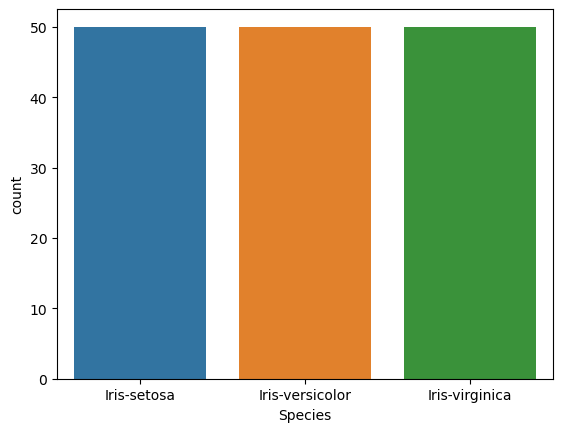

In [12]:
# Seaborn Kütüphanesi Yardımıyla Value Countsların Grafiksel Gösterimi.
sns.countplot(x = "Species", data = df)


<div style="color:orange;">
    <h5>Korelasyonların İncelenmesi</h5>
</div>

- Korelasyon, iki veya daha fazla değişken arasındaki ilişkiyi ölçen istatistiksel bir kavramdır. 
- Korelasyon, bu değişkenlerin birbirleriyle ne kadar güçlü bir ilişki içinde olduğunu ve bu ilişkinin ne yönde olduğunu belirlemek için kullanılır.

- Korelasyonu r ile gösterirsek;

<h6>
    
    r 0.2 den küçük ise çok zayıf ilişki yada korelasyon yok

    0.2-0.4 arasında ise zayıf korelasyon

    0.4-0.6 arasında ise orta şiddette korelasyon

    0.6-0.8 arasında ise yüksek korelasyon

    0.8> ise çok yüksek korelasyon olduğu yorumu yapılır.
    

In [13]:
# Korelasyon İncelemesinin Yapılması İçin Sadece Sayısal Veriler Kullanılmalıdır, Kategorik Değişkenler Droplanmalı.
# Axis = 1 Sütun, Axis = 0 Satır
# Ayrıca ID Collumn'u İşe Yaramadığından Silebiliriz Burada Bize Korelasyon Hakkında Bilgi Vereceğini Düşünmüyorum

num_df = df.drop(['Species','Id'], axis=1)
corr = num_df.corr()

In [14]:
# Korelasyonun Sayısal Değerlerle Gösterilmesi
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


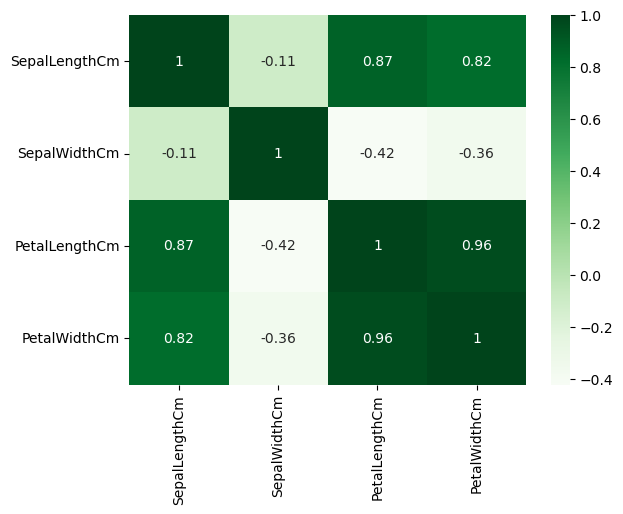

In [15]:
# Korelasyonun Heatmap İle Çizilmesi "with Seaborn".
sns.heatmap(corr, annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = "Greens");

<div style="color:orange;">
    <h5>Bazı Çıkarımlar</h5>
</div>

- Korelasyonun ısı haritası ve sayısal değerlerine baktığımız zaman korelasyon katsıyı "1'e" ne kadar yakın ise o kadar pozitif ilişki vardır diyebiliriz ;
- 1.En Yüksek Korelasyon : 0.96 => PetalLength & PetalWidth
- 2.En Yüksek Korelasyon : 0.87 => SepalLenght & PetalLenght

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

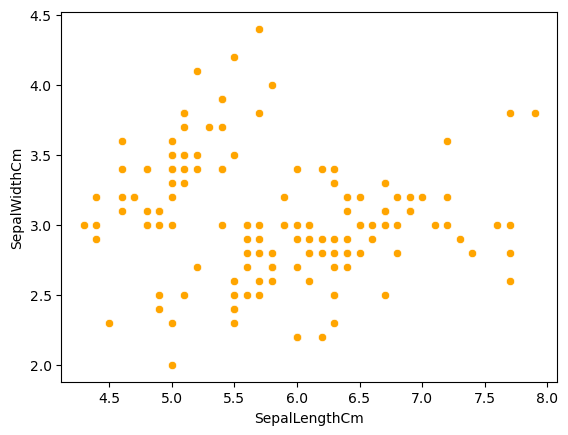

In [16]:
# Sepal ve Petal verilerine ait görsel incelemelere devam edersek,

sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, color = "Orange")

In [17]:
# SepalWidth Verilerinin Yoğunluğunun (Dağılımının) 3.0 Cm - 3.7 Cm Civarlarında oLduğunu,
# SepalLength Verilerinin Yoğunluğunun (Dağılımının) 5.5 Cm - 7.0 Cm Civarlarında Olduğunu Görüyoruz.

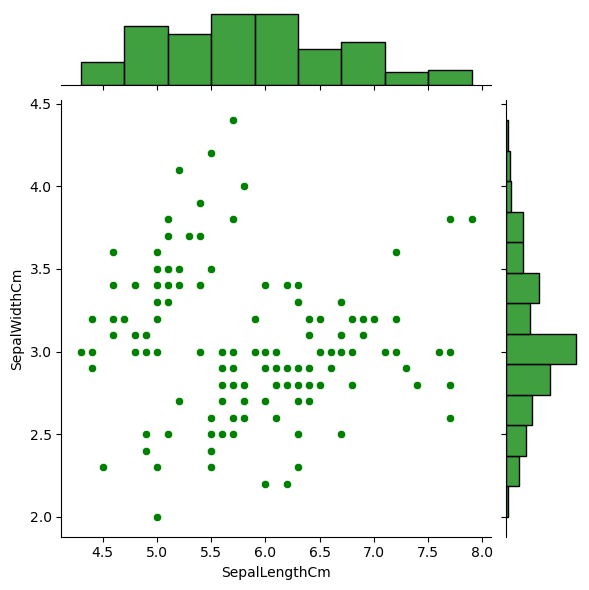

In [18]:
# Joinplot kullanarak frekanslarını inceleyelim. (for SepalLength - SepalWidth)

sns.jointplot(x = "SepalLengthCm", y = "SepalWidthCm", data = df, color = "Green")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

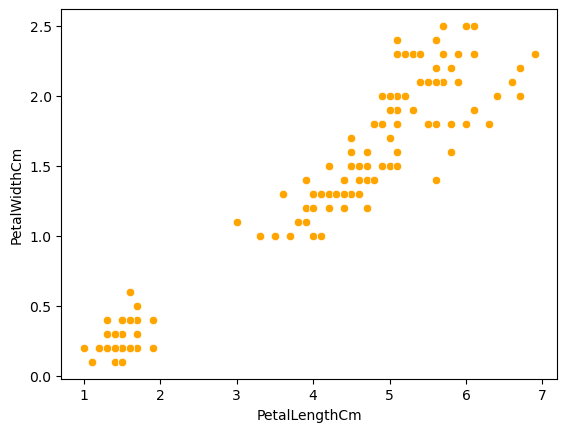

In [19]:
# Scatterplot kullanarak petallenght ve petalwidth incelenmesi.

sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df, color = "Orange")

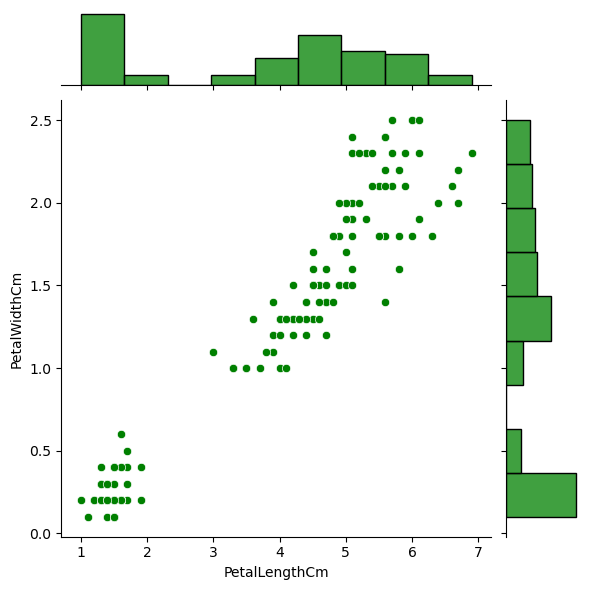

In [20]:
# (for PetalLength - PetalWidth)

sns.jointplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df, color = "Green")

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

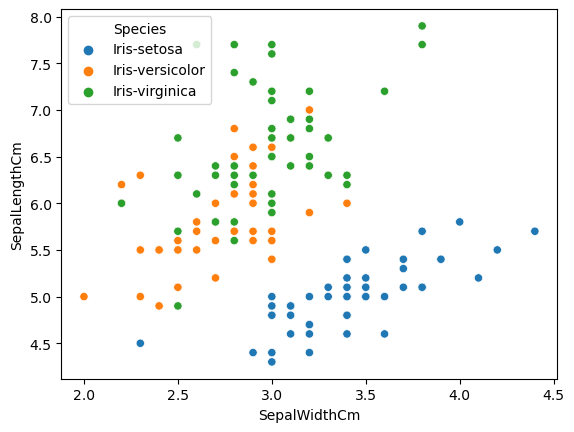

In [21]:
# Türlere (Species) göre Sepal Verilerinin dağılımlarını inceleyelim ve kümeleme yapılabilir mi düşünelim.

sns.scatterplot(x = "SepalWidthCm", y = "SepalLengthCm", hue = "Species", data = df)

In [22]:
# Setosa tamamen ayırt edilebilirken, virginica ve versicolor kolay ayırt edilemiyor.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

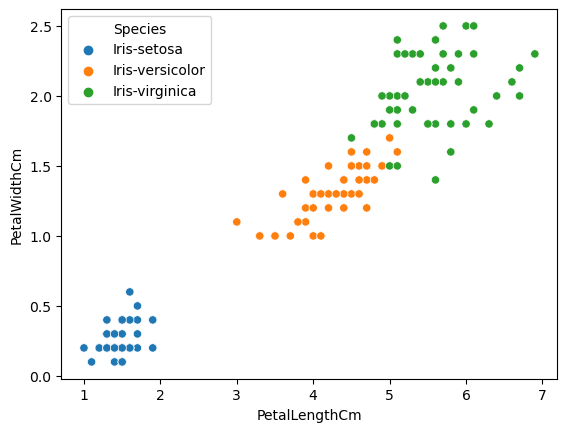

In [23]:
# Bu Sefer Türlere (Species) göre Petal Verilerinin dağımlarını inceleyelim ve kümeleme yapılabilir mi düşünelim.

sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = "Species", data = df)

In [24]:
# Setosa tekrardan belirgin bir şekilde ayırt edilebiliyor
# Dağılama Bakınca Virginica bitki türünün setosaya göre daha büyük petal büyüklüklerine sahip olduğunu görmüş oluyoruz.

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

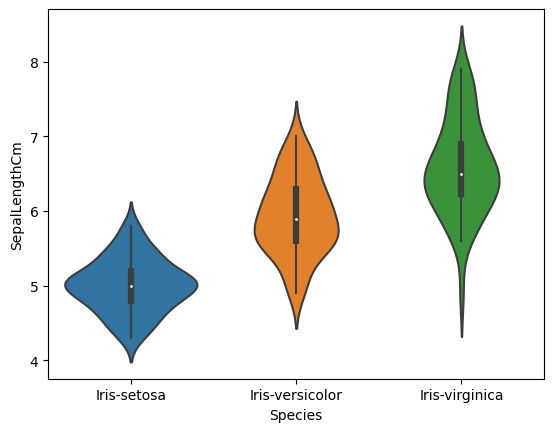

In [25]:
# Violin (Keman Grafiği) ile bitkilerin sepal uzunluklarına ait farklı bir bakış açısı elde edelim.

sns.violinplot(x = "Species", y = "SepalLengthCm", data = df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

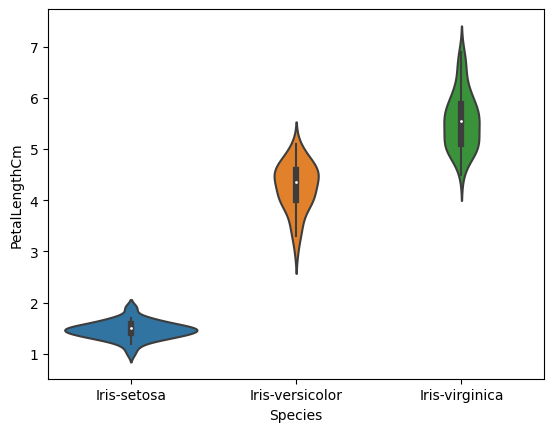

In [26]:
# Violin ile bitkilerin petal uzunluklarına ait farklı bir bakış açısı elde edelim.

sns.violinplot(x = "Species", y = "PetalLengthCm", data = df)

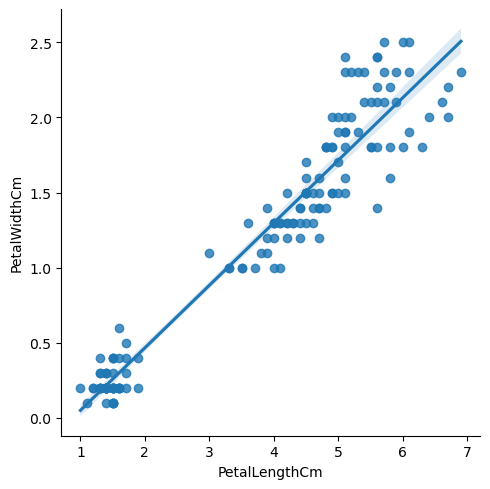

In [27]:
# lmplot kullanarak korelasyon değeri en yüksek olan PetalLenght - PetalWidth verilerinin pozitif grafiğini çizelim.

sns.lmplot(x= "PetalLengthCm", y= "PetalWidthCm", data = df)

In [28]:
# Pozitif Güçlü İlişki olduğunu grafiksel olarakda görmüş olduk.

In [29]:
# Korelasyon Katsayıları : 0.96 
num_df.corr()["PetalLengthCm"]["PetalWidthCm"]

0.9627570970509662

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

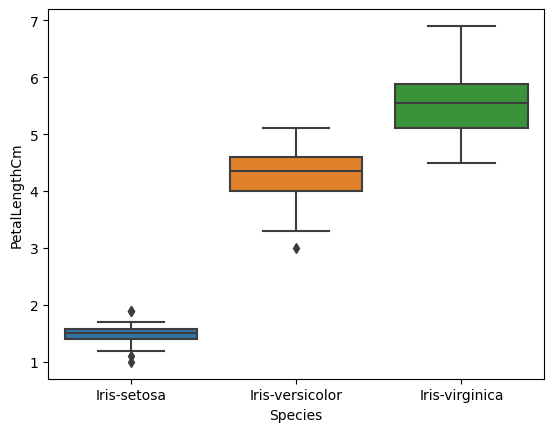

In [30]:
# Petal Lenght için Outlier incelemesi
sns.boxplot(x = "Species", y = "PetalLengthCm", data = df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

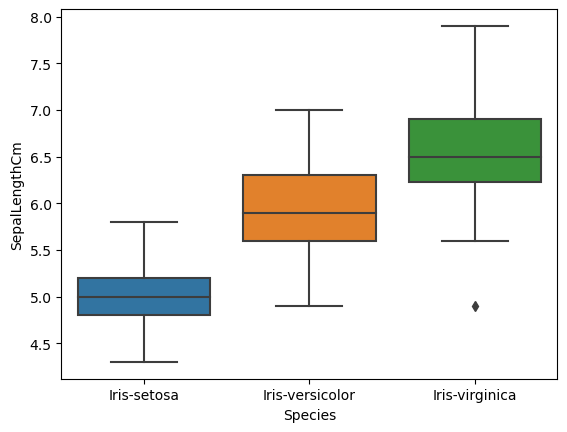

In [31]:
# Sepal Lenght için Outlier İncelemesi
sns.boxplot(x= "Species", y = "SepalLengthCm", data = df)



<div style="color:orange;">
    <h5>Basit Makine Öğrenmesi Uygulaması</h5>
</div>

In [32]:
# Veri Setinin input ve output olarak ayrılması

In [33]:
data = df.values
X = data[:,0:4]
Y = data[:,5]

In [34]:
# Test-Train-Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [38]:
predictLR = model_LR.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictLR)*100)

Accuracy: 100.0


### SVM ( Support Vector Machine)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
model_SVC = SVC()
model_SVC.fit(X_train, y_train)

SVC()

In [41]:
predictSVC = model_SVC.predict(X_test)
print("Accuracy:",accuracy_score(y_test,predictSVC)*100)

Accuracy: 96.66666666666667
